K = 1: Accuracy = 1.0000
K = 3: Accuracy = 1.0000
K = 5: Accuracy = 1.0000
K = 7: Accuracy = 1.0000
K = 9: Accuracy = 1.0000

Best K = 1 with accuracy 1.0000


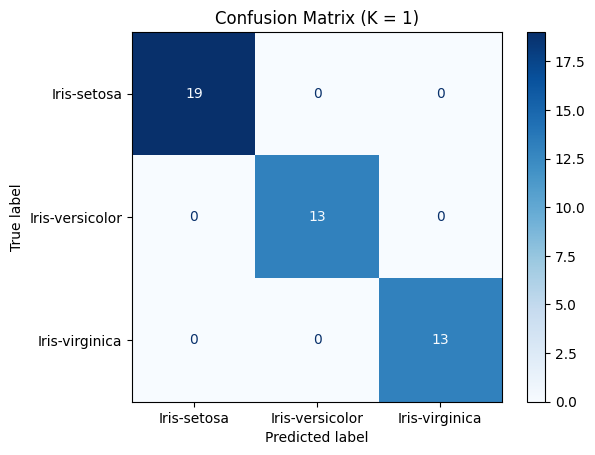

<ipython-input-1-c65ae1d2a131>:88: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap=plt.cm.get_cmap('viridis', len(le.classes_))


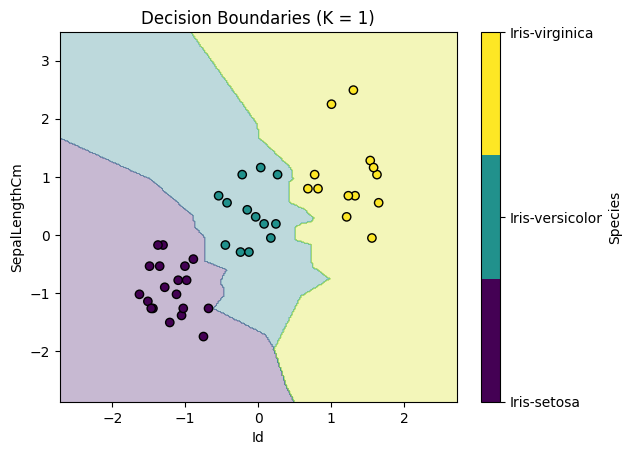

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


df = pd.read_csv('/content/Iris copy.csv')

X = df.iloc[:, :-1].values
y_str = df.iloc[:, -1].values


le = LabelEncoder()
y = le.fit_transform(y_str)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)


k_values = [1, 3, 5, 7, 9]
best_k, best_acc = None, 0
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"K = {k}: Accuracy = {acc:.4f}")
    if acc > best_acc:
        best_acc, best_k = acc, k

print(f"\nBest K = {best_k} with accuracy {best_acc:.4f}")


knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)
y_best_pred = knn_best.predict(X_test)

cm = confusion_matrix(y_test, y_best_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=le.classes_)
disp.plot(cmap='Blues')
plt.title(f'Confusion Matrix (K = {best_k})')
plt.show()


X_vis = X_scaled[:, :2]
Xv_train, Xv_test, yv_train, yv_test = train_test_split(
    X_vis, y, test_size=0.3, random_state=42
)

knn_vis = KNeighborsClassifier(n_neighbors=best_k)
knn_vis.fit(Xv_train, yv_train)


h = 0.02
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)


Z = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


plt.figure()
plt.contourf(xx, yy, Z, alpha=0.3)


plt.scatter(
    Xv_test[:, 0],
    Xv_test[:, 1],
    c=yv_test,
    edgecolor='k',
    cmap=plt.cm.get_cmap('viridis', len(le.classes_))
)

plt.xlabel(df.columns[0])
plt.ylabel(df.columns[1])
plt.title(f'Decision Boundaries (K = {best_k})')
plt.colorbar(
    ticks=range(len(le.classes_)),
    label='Species'
).ax.set_yticklabels(le.classes_)
plt.show()
